In [531]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import scipy.stats as stats
from scipy import stats

In [532]:
df = pd.read_csv('insurance.csv')

<h1>Descriptive Analysis</h1>

<h4>Average charges based on age</h4>

<h3>Statistik Deskriptif</h3>

<h4>Deskriptif Sex</h4>

In [538]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [539]:
# Hitung statistik deskriptif 
summary_statistics_sex = df.groupby('sex').agg({
    'age': ['count', 'mean'],         # Jumlah data, rata-rata umur
    'bmi': 'mean',                    # Rata-rata bmi
    'charges': ['mean', 'std', 'min', 'max']  # Rata-rata, std, minimum, dan maksimum charges
}).reset_index()

# Hitung persentase jumlah data terhadap total (1338)
summary_statistics_sex['age', 'count'] = summary_statistics_sex['age', 'count'] / 1338 * 100

# Ubah cara tampilan angka desimal
pd.options.display.float_format = '{:.2f}'.format  # Menggunakan dua angka desimal

In [540]:
summary_statistics_sex.columns = ['Sex', 'percentage', 'Mean Age', 
                              'Mean BMI', 'Mean Charges', 
                              'Standard Charges', 'Min Charges', 
                              'Max Charges']

In [541]:
summary_statistics_sex

,Sex,percentage,Mean Age,Mean BMI,Mean Charges,Standard Charges,Min Charges,Max Charges
0,female,49.48,39.50,30.38,12569.58,11128.70,1607.51,63770.43
1,male,50.52,38.92,30.94,13956.75,12971.03,1121.87,62592.87


In [542]:
summary_statistics_sex['Mean Age'].sum()/2

39.21009045567493

<h4>Deskriptif Smoker</h4>

In [543]:
# Hitung statistik deskriptif 
summary_statistics_smoker = df.groupby('smoker').agg({
    'age': ['count', 'mean'],         # Jumlah data, rata-rata umur
    'bmi': 'mean',                    # Rata-rata bmi
    'charges': ['mean', 'std', 'min', 'max']  # Rata-rata, std, minimum, dan maksimum charges
}).reset_index()

# Hitung persentase jumlah data terhadap total (1338)
summary_statistics_smoker['age', 'count'] = summary_statistics_smoker['age', 'count'] / 1338 * 100

# Ubah cara tampilan angka desimal
pd.options.display.float_format = '{:.2f}'.format  # Menggunakan dua angka desimal

In [544]:
summary_statistics_smoker.columns = ['Smoker', 'percentage', 'Mean Age', 
                              'Mean BMI', 'Mean Charges', 
                              'Std_charges', 'Min Charges', 
                              'Max Charges']

In [545]:
summary_statistics_smoker

,Smoker,percentage,Mean Age,Mean BMI,Mean Charges,Std_charges,Min Charges,Max Charges
0,no,79.52,39.39,30.65,8434.27,5993.78,1121.87,36910.61
1,yes,20.48,38.51,30.71,32050.23,11541.55,12829.46,63770.43


<h4>Deskriptif Smoker dan Sex</h4>

In [546]:
# Menggunakan groupby untuk mengelompokkan berdasarkan 'smoker' dan 'sex' dan menghitung statistik
summary_smoker_sex = df.groupby(['smoker', 'sex']).agg({
    'age': ['count', 'mean'],                 # Jumlah data, average age
    'bmi': 'mean',                            # Mean bmi
    'charges': ['mean', 'std', 'min', 'max']  # Mean, variance, min, max charges
}).reset_index()

# Hitung persentase jumlah data terhadap total (1338)
summary_smoker_sex['age', 'count'] = summary_smoker_sex['age', 'count'] / 1338 * 100

# Ubah cara tampilan angka desimal
pd.options.display.float_format = '{:.2f}'.format  # Menggunakan dua angka desimal

# Memberi nama ulang kolom-kolom pada hasil agregasi
summary_smoker_sex.columns = ['smoker', 'sex', 'percentage', 'mean_age', 
                              'mean_bmi', 'mean_charges', 'std_charges',
                              'min_charges', 'max_charges']

# Menampilkan hasil
summary_smoker_sex


,smoker,sex,percentage,mean_age,mean_bmi,mean_charges,std_charges,min_charges,max_charges
0,no,female,40.88,39.69,30.54,8762.30,6060.78,1607.51,36910.61
1,no,male,38.64,39.06,30.77,8087.20,5908.11,1121.87,32108.66
2,yes,female,8.59,38.61,29.61,30679.00,11907.54,13844.51,63770.43
3,yes,male,11.88,38.45,31.50,33042.01,11202.67,12829.46,62592.87


<h4> Deskriptif BMI</h4>

In [547]:
# Membuat kategori BMI
bmi = df
bmi = bmi['bmi'].apply(lambda x: 'no' if x <= 25
                                                else 'yes'
                                            )

In [548]:
df_kategori_bmi = df
df_kategori_bmi.insert(2, 'overweight', bmi)

In [549]:
# df_kategori_bmi.drop('bmi', axis=1, inplace=True)

In [550]:
# Menggunakan groupby untuk mengelompokkan berdasarkan 'smoker' dan 'sex' dan menghitung statistik
summary_smoker_weight = df.groupby(['smoker', 'overweight']).agg({
    'age': ['count', 'mean'],                 # Jumlah data, average age
    'bmi': 'mean',                            # Mean bmi
    'charges': ['mean', 'std', 'min', 'max']  # Mean, variance, min, max charges
}).reset_index()

# Hitung persentase jumlah data terhadap total (1338)
summary_smoker_weight['age', 'count'] = summary_smoker_weight['age', 'count'] / 1338 * 100

# Ubah cara tampilan angka desimal
pd.options.display.float_format = '{:.2f}'.format  # Menggunakan dua angka desimal

# Memberi nama ulang kolom-kolom pada hasil agregasi
summary_smoker_weight.columns = ['smoker', 'overweight', 'percentage', 'mean_age', 
                              'mean_bmi', 'mean_charges', 'std_charges',
                              'min_charges', 'max_charges']

# Menampilkan hasil
summary_smoker_weight


,smoker,overweight,percentage,mean_age,mean_bmi,mean_charges,std_charges,min_charges,max_charges
0,no,no,14.35,36.28,22.21,7547.18,5708.02,1121.87,30166.62
1,no,yes,65.17,40.07,32.51,8629.59,6040.55,1131.51,36910.61
2,yes,no,4.11,37.31,22.28,19839.28,4583.25,12829.46,35069.37
3,yes,yes,16.37,38.82,32.83,35116.91,10702.56,15518.18,63770.43


<h1>Discrete Analysis</h1>

In [551]:
# 3.Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [552]:
# Menggunakan groupby untuk mengelompokkan
summary_region = df.groupby(['region']).agg({
            'age': ['count', 'mean'],                 # Jumlah data, average age
            'bmi': 'mean',                            # Mean bmi
            'charges': ['mean', 'std', 'min', 'max']  # Mean, variance, min, max charges
}).reset_index()

# Hitung persentase jumlah data terhadap total (1338)
summary_region['age', 'count'] = summary_region['age', 'count'] / 1338 * 100

# Ubah cara tampilan angka desimal
pd.options.display.float_format = '{:.2f}'.format  # Menggunakan dua angka desimal

# Memberi nama ulang kolom-kolom pada hasil agregasi
summary_region.columns = ['region', 'percentage', 'mean_age', 
                          'mean_bmi', 'mean_charges', 'std_charges',
                          'min_charges', 'max_charges']

# Menampilkan hasil
summary_region


,region,percentage,mean_age,mean_bmi,mean_charges,std_charges,min_charges,max_charges
0,northeast,24.22,39.27,29.17,13406.38,11255.80,1694.80,58571.07
1,northwest,24.29,39.20,29.20,12417.58,11072.28,1621.34,60021.40
2,southeast,27.20,38.94,33.36,14735.41,13971.10,1121.87,63770.43
3,southwest,24.29,39.46,30.60,12346.94,11557.18,1241.57,52590.83


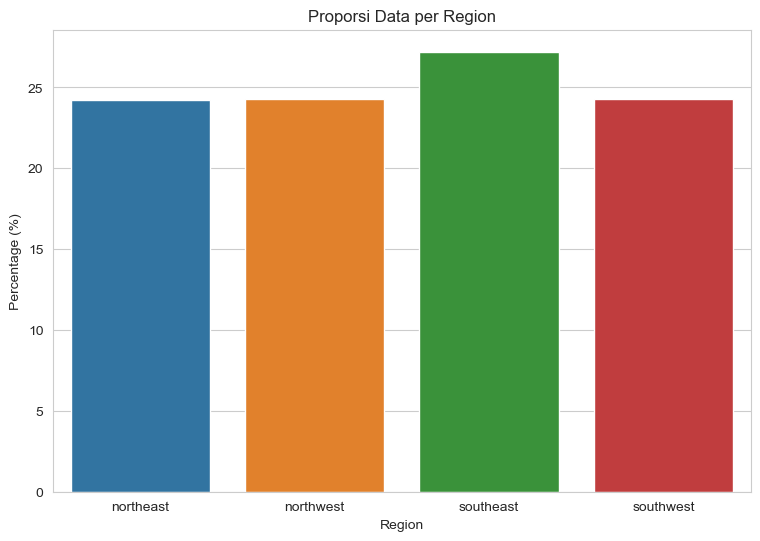

In [553]:
plt.figure(figsize=(9, 6))
sns.barplot(data=summary_region,
            x=summary_region['region'], 
            y=summary_region['percentage'])
plt.title('Proporsi Data per Region')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.show()

In [554]:
# 4.Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [555]:
# Hitung statistik deskriptif 
summary_statistics_smoker_2 = df.groupby('smoker').agg({
    'age': ['count', 'mean'],         # Jumlah data, rata-rata umur
    'bmi': 'mean',                    # Rata-rata bmi
    'charges': ['mean', 'std', 'min', 'max']  # Rata-rata, std, minimum, dan maksimum charges
}).reset_index()

# Hitung persentase jumlah data terhadap total (1338)
# summary_statistics_smoker['age', 'count'] = summary_statistics_smoker['age', 'count'] / 1338 * 100

# Ubah cara tampilan angka desimal
# pd.options.display.float_format = '{:.2f}'.format  # Menggunakan dua angka desimal

summary_statistics_smoker_2.columns = ['Smoker', 'count', 'Mean Age', 
                              'Mean BMI', 'Mean Charges', 
                              'Std_charges', 'Min Charges', 
                              'Max Charges']

summary_statistics_smoker_2

,Smoker,count,Mean Age,Mean BMI,Mean Charges,Std_charges,Min Charges,Max Charges
0,no,1064,39.39,30.65,8434.27,5993.78,1121.87,36910.61
1,yes,274,38.51,30.71,32050.23,11541.55,12829.46,63770.43


In [556]:
# Menggunakan groupby untuk mengelompokkan berdasarkan 'smoker' dan 'sex' dan menghitung statistik
summary_smoker_sex_2 = df.groupby(['smoker', 'sex']).agg({
    'age': ['count', 'mean'],                 # Jumlah data, average age
    'bmi': 'mean',                            # Mean bmi
    'charges': ['mean', 'std', 'min', 'max']  # Mean, variance, min, max charges
}).reset_index()

# # Hitung persentase jumlah data terhadap total (1338)
# summary_smoker_sex['age', 'count'] = summary_smoker_sex['age', 'count'] / 1338 * 100

# # Ubah cara tampilan angka desimal
# pd.options.display.float_format = '{:.2f}'.format  # Menggunakan dua angka desimal

# Memberi nama ulang kolom-kolom pada hasil agregasi
summary_smoker_sex_2.columns = ['smoker', 'sex', 'count', 'mean_age', 
                              'mean_bmi', 'mean_charges', 'std_charges',
                              'min_charges', 'max_charges']

# Menampilkan hasil
summary_smoker_sex_2


,smoker,sex,count,mean_age,mean_bmi,mean_charges,std_charges,min_charges,max_charges
0,no,female,547,39.69,30.54,8762.30,6060.78,1607.51,36910.61
1,no,male,517,39.06,30.77,8087.20,5908.11,1121.87,32108.66
2,yes,female,115,38.61,29.61,30679.00,11907.54,13844.51,63770.43
3,yes,male,159,38.45,31.50,33042.01,11202.67,12829.46,62592.87


In [557]:
# peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok adalah
P_female_merokok_given_merokok = 115/274
P_female_merokok_given_merokok

0.4197080291970803

In [558]:
# Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
P_male_merokok_given_merokok = 159/274
P_male_merokok_given_merokok

0.5802919708029197

In [559]:
data = {'Sex': ['female', 'male'],
        'Peluang': [0.42, 0.58]}

df_p = pd.DataFrame(data)
df_p

,Sex,Peluang
0,female,0.42
1,male,0.58


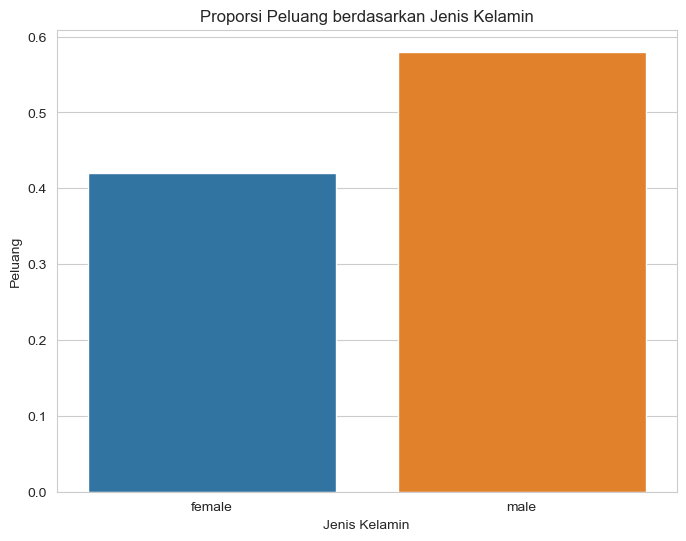

In [560]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_p, x='Sex', y='Peluang')
plt.title('Proporsi Peluang berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Peluang')
plt.show()

In [561]:
# 7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

In [562]:
df.head()

,age,sex,overweight,bmi,children,smoker,region,charges
0,19,female,yes,27.90,0,yes,southwest,16884.92
1,18,male,yes,33.77,1,no,southeast,1725.55
2,28,male,yes,33.00,3,no,southeast,4449.46
3,33,male,no,22.70,0,no,northwest,21984.47
4,32,male,yes,28.88,0,no,northwest,3866.86


In [563]:
# Membuat kisaran tagihan per 10,000
tagihan_ranges = list(range(0, 70001, 10000))

# Menambahkan kolom 'tagihan_range' ke DataFrame untuk mengkategorikan tagihan
df['tagihan_range'] = pd.cut(df['charges'], bins=tagihan_ranges)

# Menghitung jumlah orang dalam setiap region dan tagihan range
result = df.groupby(['region', 'tagihan_range']).size().unstack(fill_value=0)

# result.columns = ['0 - 10000', '10000 - 20000', '20000 - 30000', 
#                   '30000 - 40000', '40000 - 50000', '50000 - 60000', 
#                   '60000 - 70000']

result.columns = ['0 - 10000', '10001 - 20000', '20001 - 30000', 
                  '30001 - 40000', '40001 - 50000', '50001 - 60000', 
                  '60001 - 70000']

# Menampilkan tabel
result


,0 - 10000,10001 - 20000,20001 - 30000,30001 - 40000,40001 - 50000,50001 - 60000,60001 - 70000
region,,,,,,,
northeast,161,95,33,20,14,1,0
northwest,176,88,32,15,12,1,1
southeast,193,83,27,25,34,0,2
southwest,182,87,19,23,12,2,0


In [564]:
result_pivot = result.unstack(fill_value=0).reset_index()
result_pivot = result_pivot.rename(columns={'level_0': 'range', 0: 'jumlah_orang'})
result_pivot
# result_pivot = result_pivot.pivot_table(index='level_0', columns='region')
# result_pivot

,range,region,jumlah_orang
0,0 - 10000,northeast,161
1,0 - 10000,northwest,176
2,0 - 10000,southeast,193
3,0 - 10000,southwest,182
4,10001 - 20000,northeast,95
5,10001 - 20000,northwest,88
6,10001 - 20000,southeast,83
7,10001 - 20000,southwest,87
8,20001 - 30000,northeast,33
9,20001 - 30000,northwest,32


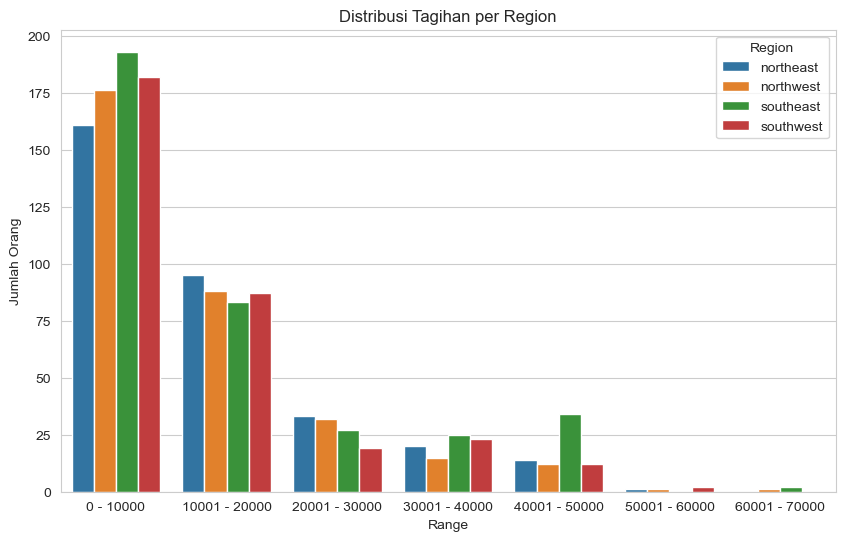

In [565]:
# Membuat bar chart
plt.figure(figsize=(10, 6)) 
sns.barplot(data=result_pivot, x='range', y='jumlah_orang', hue='region')
plt.xticks(rotation=0) 
plt.xlabel('Range')
plt.ylabel('Jumlah Orang')
plt.title('Distribusi Tagihan per Region')
plt.legend(title='Region')

plt.show()

In [566]:
# Proporsi smoker dan non-smoker
total_orang = summary_statistics_smoker_2['count'].sum()
plot_smoker = summary_statistics_smoker_2
plot_smoker['proporsi'] = plot_smoker['count'] / total_orang
plot_smoker

,Smoker,count,Mean Age,Mean BMI,Mean Charges,Std_charges,Min Charges,Max Charges,proporsi
0,no,1064,39.39,30.65,8434.27,5993.78,1121.87,36910.61,0.80
1,yes,274,38.51,30.71,32050.23,11541.55,12829.46,63770.43,0.20


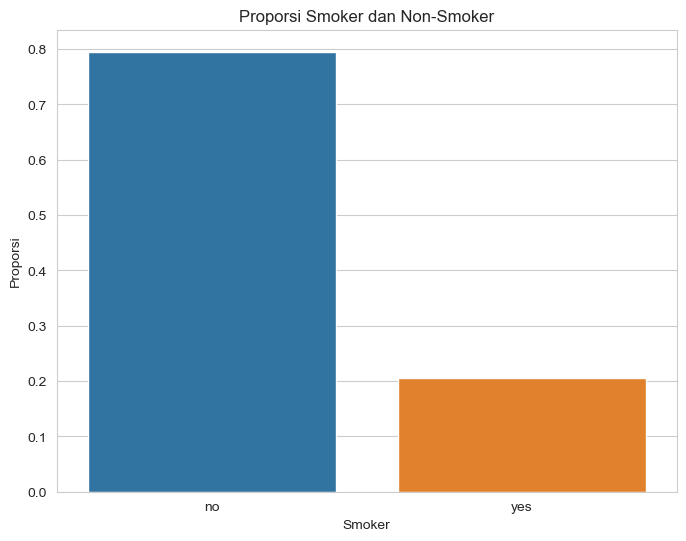

In [567]:
plt.figure(figsize=(8, 6))
sns.barplot(data=plot_smoker, x='Smoker', y='proporsi')
plt.title('Proporsi Smoker dan Non-Smoker')
plt.xlabel('Smoker')
plt.ylabel('Proporsi')
plt.show()

<h1>Analisa Variabel Kontinu</h1>

In [568]:
# 1. Mana yang lebih mungkin terjadi
# a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
# atau
# b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas
# 16.7k

In [569]:
# Jawab 1

In [570]:
# Hitung jumlah individu dengan BMI di atas 25 dan tagihan di atas 16.7k
count_a = len(df[(df['bmi'] > 25) & (df['charges'] > 16700)])

# Hitung jumlah individu dengan BMI di bawah 25 dan tagihan di atas 16.7k
count_b = len(df[(df['bmi'] < 25) & (df['charges'] > 16700)])

total_a_b = count_a + count_b
total_a_b

334

In [571]:
# Peluang BMI > 25 mendapat tagihan di atas 16.7k
peluang_lebih = count_a/total_a_b
peluang_lebih

0.8473053892215568

In [572]:
# Peluang BMI < 25 mendapat tagihan di atas 16.7k
peluang_kurang = 1 - peluang_lebih
peluang_kurang

0.15269461077844315

In [573]:
# 2. Mana yang lebih mungkin terjadi
# a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
# diatas 16.7k, atau
# b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
# diatas 16.7k

In [574]:
# Hitung jumlah individu perokok dengan BMI di atas 25 dan tagihan di atas 16.7k
count_a_s = len(df[(df['smoker'] == 'yes') & (df['bmi'] > 25) & (df['charges'] > 16700)])

# Hitung jumlah individu non-prokok dengan BMI di atas 25 dan tagihan di atas 16.7k
count_b_s = len(df[(df['smoker'] == 'no') & (df['bmi'] > 25) & (df['charges'] > 16700)])

total_a_b_s = count_a_s + count_b_s
total_a_b_s

283

In [575]:
# Peluang smoker BMI > 25 mendapat tagihan di atas 16.7k
peluang_lebih_s = count_a_s/total_a_b_s
peluang_lebih

0.8473053892215568

In [576]:
# Peluang non-smoker BMI > 25 mendapat tagihan di atas 16.7k
peluang_kurang_s = 1 - peluang_lebih_s
peluang_kurang_s

0.24028268551236753

<h1>Analisa Korelasi Variabel</h1>

In [592]:
df.head()

,age,sex,overweight,bmi,children,smoker,region,charges,tagihan_range
0,19,female,yes,27.90,0,yes,southwest,16884.92,"(10000, 20000]"
1,18,male,yes,33.77,1,no,southeast,1725.55,"(0, 10000]"
2,28,male,yes,33.00,3,no,southeast,4449.46,"(0, 10000]"
3,33,male,no,22.70,0,no,northwest,21984.47,"(20000, 30000]"
4,32,male,yes,28.88,0,no,northwest,3866.86,"(0, 10000]"


In [594]:
#Koefisien korelasi bmi dan variable tanggungan anak.
correlation_bmi_charges = df['bmi'].corr(df['children'])
print("Koefisien Korelasi antara BMI dan Tagihan:", correlation_bmi_charges)

Koefisien Korelasi antara BMI dan Tagihan: 0.012758900820673833


In [595]:
#Koefisien korelasi jumlaha anak dan tagihan
correlation_children_charges = df['children'].corr(df['charges'])
print("Koefisien Korelasi antara Jumlah Anak dan Tagihan:", correlation_children_charges)


Koefisien Korelasi antara Jumlah Anak dan Tagihan: 0.06799822684790487


In [580]:
#Koefisien korelasi bmi dengan tagihan
correlation_bmi_charges = df['bmi'].corr(df['charges'])
print("Koefisien Korelasi antara bmi dan Tagihan:", correlation_bmi_charges)


Koefisien Korelasi antara bmi dan Tagihan: 0.1983409688336289


In [581]:
#Koefisien korelasi usia dengan tagihan
correlation_age_charges = df['age'].corr(df['charges'])
print("Koefisien Korelasi antara Usia dan Tagihan:", correlation_age_charges)


Koefisien Korelasi antara Usia dan Tagihan: 0.29900819333064765


<h1>Pengujian Hipotesis</h1>

In [582]:
# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
# 2. Proporsi perokok laki laki lebih besar dari perempuan
# 3. Tagihan kesehatan laki-laki lebih besar dari perempuan

In [583]:
# Jawab 1

H0 : u_s <= ns
H1 : u_s > ns
alfa = 0.05
t test



In [605]:
# Pisahkan data menjadi dua kelompok: perokok dan non-perokok
tagihan_perokok = df[df['smoker'] == 'yes']['charges']
tagihan_non_perokok = df[df['smoker'] == 'no']['charges']

# Lakukan uji t (t-test)
t_statistic, p_value = stats.ttest_ind(tagihan_perokok, tagihan_non_perokok)

# Output hasil uji t-test
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Tingkat signifikansi (alpha)
alpha = 0.05

# Hitung titik kritis (critical value)
df_perokok = len(tagihan_perokok) - 1
df_non_perokok = len(tagihan_non_perokok) - 1
critical_value = stats.t.ppf(1 - alpha, df=df_perokok if df_perokok < df_non_perokok else df_non_perokok)
print(f"critical value t: {critical_value}")

# Analisis hasil uji berdasarkan nilai t
if t_statistic > critical_value:
    print("Rata-rata tagihan smoker lebih besar dari non-smoker.")
else:
    print("Rata-rata tagihan non-smoker lebih besar dari smoker")

T-Statistic: 46.66492117272371
P-Value: 8.271435842179102e-283
critical value t: 1.6504543030215924
Rata-rata tagihan smoker lebih besar dari non-smoker.


In [585]:
# Proporsi perokok laki laki lebih besar dari perempuan

In [586]:
# Jawab 2

H0 : p_m < p_f
H1 : P_m > p_f
alfa = 0.05
z test

In [607]:
from scipy import stats

# Hitung proporsi perokok laki-laki dan perempuan
male_smokers = len(df[(df['sex'] == 'male') & (df['smoker'] == 'yes')])
female_smokers = len(df[(df['sex'] == 'female') & (df['smoker'] == 'yes')])

# Jumlah total laki-laki dan perempuan dalam sampel
n_male = len(df[df['sex'] == 'male'])
n_female = len(df[df['sex'] == 'female'])

# Proporsi gabungan dari seluruh populasi
p = (male_smokers + female_smokers) / (n_male + n_female)

# Hitung Z-score
p1 = male_smokers / n_male
p2 = female_smokers / n_female
z_score = (p1 - p2) / ((p * (1 - p) * (1/n_male + 1/n_female))**0.5)

# Hitung p-value
p_value = 1 - stats.norm.cdf(z_score)

# Tentukan tingkat signifikansi (alpha)
alpha = 0.05

# Uji hipotesis
if p_value < alpha:
    print("Proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan.")
else:
    print("Tidak cukup bukti untuk menyatakan bahwa proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan.")

print(z_score)
p_value

Proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan.
2.7867402154855503


0.002662057082160274

In [588]:
# 3. Tagihan kesehatan laki-laki lebih besar dari perempuan

In [589]:
# Jawab

H0 : u_m < u_f
H1 : u_m > u_f
alfa = 0.05

In [604]:
# Pisahkan data menjadi dua kelompok: laki-laki dan perempuan
tagihan_laki_laki = df[df['sex'] == 'male']['charges']
tagihan_perempuan = df[df['sex'] == 'female']['charges']

# Lakukan uji T-Test
t_statistic, p_value = stats.ttest_ind(tagihan_laki_laki, tagihan_perempuan)

# Output hasil uji T-Test
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Tingkat signifikansi (alpha)
alpha = 0.05

# Analisis hasil uji
if p_value < alpha:
    print("Rata-rata tagihan kesehatan laki-laki lebih besar dari perempuan.")
else:
    print("Tidak terdapat perbedaan signifikan antara rata-rata tagihan kesehatan laki-laki dan perempuan.")


T-Statistic: 2.097546590051688
P-Value: 0.03613272100592976
Rata-rata tagihan kesehatan laki-laki lebih besar dari perempuan.
